#  King County House Price Prediction

# Abstract
This project aims to determine and predict selling price of a house in King County based on various predictor determinants such as year of its building, square feet are of various segments in the house, number of various types of rooms etc. . We consider these parameters independent of each other as an assumption and later predict selling price using Regression models. These Classification and Regression models include Random Forest,XGBoost, Logistic Regression Gradient Boosting method, 

In abstracts, you must get the essence of what your report is about, usually in about 200 words.  
 * Aim or purpose of research  
 * Method used  
 * Findings/results   
 * Conclusion   



## Dataset
* King County House Price prediction [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)  This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  
* In order to perform classification tasks, I have converted the price quantitative variable to a binary classification variable with HIGH price as 1 and LOW price as -1(For logistic regression I am taking LOW as 0)

In [0]:
import pandas as pd #Data Processing and maipulation
import numpy as np
from pandas import Series
import seaborn as sns # Data Visualisation
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline


In [2]:
#To import dataset file in google colab by uploading from file destination
from google.colab import files
uploaded = files.upload()


Saving king_county_cleansed.csv to king_county_cleansed.csv


In [0]:
#To read dataset from the uploaded file into desired dataframe via input-output stream
import io
features = pd.read_csv(io.BytesIO(uploaded['king_county_cleansed.csv']))


In [4]:
#A peep into the dataset to identify types of attributes whether categorical or continuous variable
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#To identify  distribution of values in various predictor columns
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


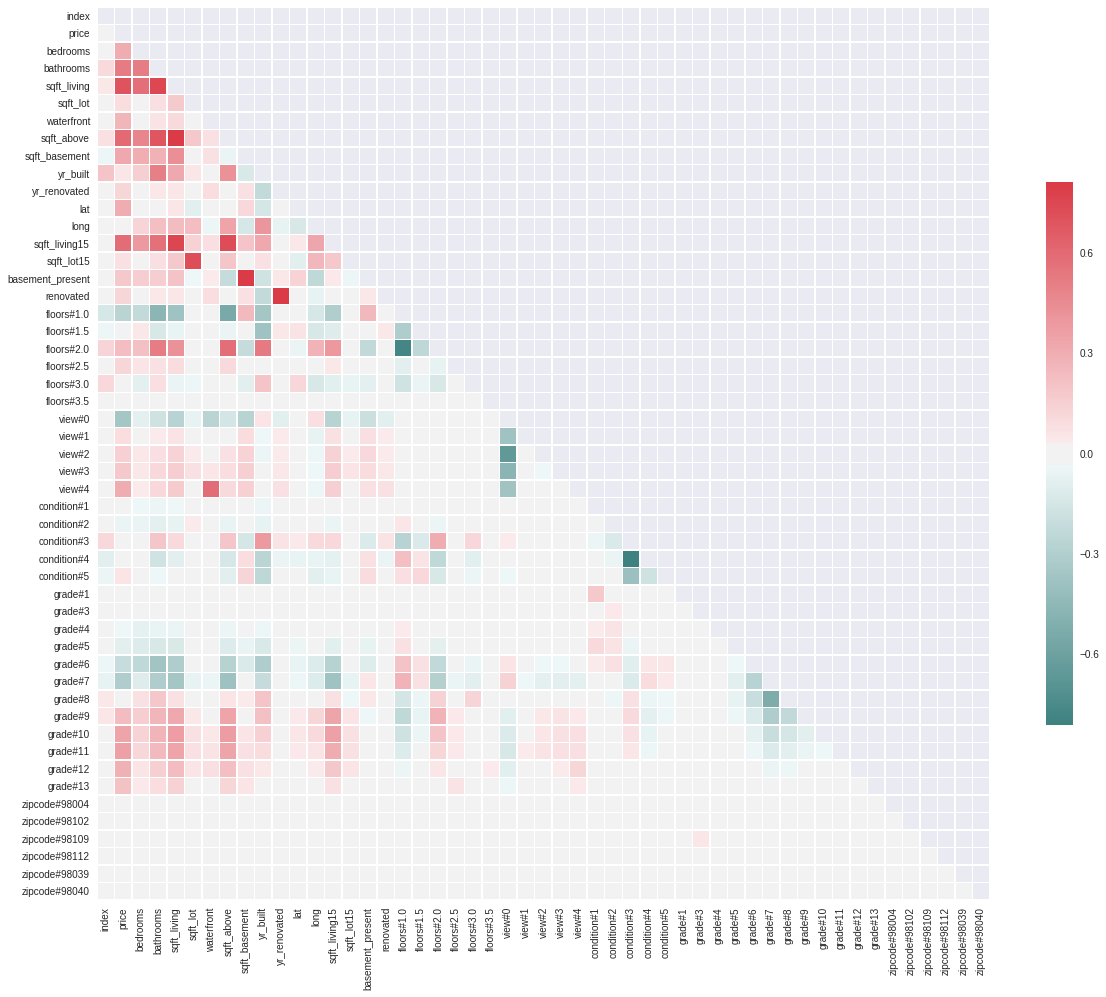

In [6]:
#To identify the colinearity between various input attributes and also between input variable and target variable
corr = features.corr()
mask = np.zeros_like(corr, dtype=np.bool)
#To substitute zeros in upper triangular values in correlation matrix
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
#To identify the median of the selling price values of houses sold in King County that are recorded in the dataset
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


Adding Price Category(price_cat) column to dataframe for holding categorical selling price value : HIGH/LOW

where all price values <= median are LOW and denoted by -1
and price Values > median are HIGH and denoted by 1

In [0]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [9]:
features[['price','price_cat']].head(10) # Sample category classification of dataset based on selling price of the house

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [10]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


## Part A

**Comparing a  Bagging Algorithm i.e,  Random Forest Classifier with a Boosting Algorithm i.e, XGBoost Classifier for generating Classification model of the dataset .**    



## Random Forest Classifier


In [0]:
from sklearn.model_selection import train_test_split

In [12]:
features.columns #To enumerate all columns of the dataset including target variable price_cat

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [0]:

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features excluding target variable 'price_cat'

y=features['price_cat']  # The target variable for classification
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# Splitting the dataset such that 70% of data values form training set  and 30% form test set

In [0]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
      'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']


In [0]:
#Import Random Forest Model from ensemble learning algorithms in sklearn's predefined library
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9026835286859963


In [17]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 0.269910
sqft_living         0.119265
sqft_living15       0.095099
sqft_above          0.075905
long                0.054328
yr_built            0.050723
sqft_lot15          0.050154
sqft_lot            0.047023
bathrooms           0.037975
grade#7             0.031852
sqft_basement       0.027874
grade#9             0.016982
grade#6             0.016636
bedrooms            0.015046
grade#8             0.013933
basement_present    0.009914
floors#1.0          0.008899
view#0              0.008466
condition#3         0.006144
grade#10            0.005855
floors#2.0          0.005302
floors#1.5          0.004485
condition#4         0.004230
condition#5         0.003547
yr_renovated        0.002780
view#2              0.002080
renovated           0.001780
view#3              0.001435
floors#3.0          0.001349
zipcode#98004       0.001346
waterfront          0.001174
zipcode#98040       0.001155
view#4              0.001140
view#1              0.000982
grade#5       

In [18]:
top_features = feature_imp.head(10)
top_features

lat              0.269910
sqft_living      0.119265
sqft_living15    0.095099
sqft_above       0.075905
long             0.054328
yr_built         0.050723
sqft_lot15       0.050154
sqft_lot         0.047023
bathrooms        0.037975
grade#7          0.031852
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


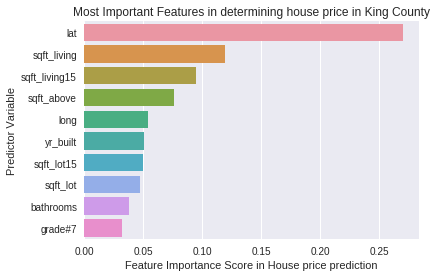

In [19]:
# Creating a bar plot of most Important features
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score in House price prediction')
plt.ylabel('Predictor Variable')
plt.title("Most Important Features in determining house price in King County")
plt.legend()
plt.show()

In [0]:
from pprint import pprint

In [21]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}



**Which hyper-parameters are important?**
 According to the documentation, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features), Maximum number of levels in tree(max_depth), Minimum number of samples (min_samples_split), Minimum number of samples required at each leaf node (min_samples_leaf


We will try adjusting the following set of hyperparameters:



### Finding important hyper-parameters


### We will use RandomSearchCV and GridSearchCV to find the best values for the same

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [29]:
clf_random.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([1.15434543, 0.34098999, 1.83498931, 2.40596374, 2.4225688 ,
        1.76858799, 3.01389146, 0.69809739, 1.16546575, 2.26503921,
        0.09979208, 1.1724697 , 2.37387776, 2.58022197, 1.82225664,
        0.20082506, 0.17899966, 0.06346099, 1.53396511, 0.15206583,
        1.55821792, 1.15828697, 0.20207254, 0.07236822, 0.96834254,
        0.15479803, 0.06544892, 1.20162956, 2.05004311, 2.24530919,
        0.69005108, 3.09564765, 0.06368415, 1.78464349, 0.88855433,
        1.79836019, 1.7721072 , 0.10076356, 1.78772291, 0.1792268 ,
        2.13490756, 1.25658902, 1.1899205 , 0.3401494 , 0.83740314,
        0.51321705, 0.17723767, 0.85765378, 2.89579248, 0.09499987,
        4.15506538, 0.96752342, 2.15550248, 2.53371565, 4.15040072,
        4.02981917, 0.12545466, 3.86698206, 1.34364843, 0.84520642,
        0.13131197, 0.85225248, 0.1573232 , 0.92765148, 0.69560734,
        1.34507449, 1.80091039, 2.37311204, 1.25543849, 3.36064498,
        1.77262314, 0.68593192,

*** What hyper-parameter values work best?
**

In [25]:
clf_random.best_params_ #The Hyperparameter values that work the best for the Random forest classifier 

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 57}

In [26]:
clf_random.best_score_ # The accuracy of classification with the specified best hyperparameters

0.9021746315024126

In [27]:
clf_random.best_estimator_# Description of Random forest classifier with hyperparameters that resulted in beat fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=57, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluate Random Search

In [0]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [0]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [0]:
best_random = clf_random.best_estimator_

In [31]:
print('AUC for ROC Curve for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('AUC for ROC curve for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

AUC for ROC Curve for base model : 0.8913703439417725
AUC for ROC curve for best model : 0.9005249036677607


### Grid Search with Cross Validation

In [32]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [200]}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.cv_results_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   28.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, 

{'mean_fit_time': array([1.15955138, 1.74929714, 2.3455859 , 2.92080824, 3.39509082,
        4.04268448]),
 'mean_score_time': array([0.09644667, 0.1147813 , 0.13955649, 0.15897576, 0.1808393 ,
        0.20528603]),
 'mean_test_score': array([0.79972239, 0.85683125, 0.87870976, 0.8883601 , 0.89516822,
        0.90157975]),
 'mean_train_score': array([0.80418402, 0.86558927, 0.89371406, 0.91589001, 0.93737193,
        0.98089761]),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 10, None],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 '

With Changes in max_depth': 2, 4, 6, 8, 10  the accuracy scores are 0.81228105, 0.86092934, 0.87699121, 0.88948377, 0.89675458, 0.90045608 respectively making this hyperparameter significant

In [33]:
param_grid ={'max_depth': [ None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [ 200]}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.cv_results_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   14.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs

{'mean_fit_time': array([4.20491823, 4.21791267]),
 'mean_score_time': array([0.22734785, 0.22924606]),
 'mean_test_score': array([0.90144755, 0.90072047]),
 'mean_train_score': array([0.98053407, 0.98162469]),
 'param_max_depth': masked_array(data=[None, None],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'sqrt'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 5],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 200],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None,
   'max_features': 'auto',
   'min_samples_leaf': 2

With Changes in max_features': 'auto', 'sqrt'  the accuracy scores are 0.90098486, 0.90052218 respectively making this hyperparameter not so significant

In [34]:
param_grid = {'max_depth': [ None],
 'max_features': ['auto'],
 'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
 'min_samples_split': [5],
 'n_estimators': [ 200]}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.cv_results_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs

{'mean_fit_time': array([4.46031173, 4.40783509, 4.0666995 , 3.91680121, 3.83870069,
        3.7853384 , 3.67130399, 3.63886873, 3.6093715 , 3.53916637]),
 'mean_score_time': array([0.24738193, 0.22859716, 0.22608821, 0.21602225, 0.20844229,
        0.20531917, 0.20247451, 0.19894187, 0.19522007, 0.19418875]),
 'mean_test_score': array([0.90184414, 0.90111706, 0.90098486, 0.90025778, 0.89920021,
        0.89853923, 0.89668848, 0.89635799, 0.89457334, 0.8958292 ]),
 'mean_train_score': array([0.99372067, 0.98175689, 0.96767797, 0.95743275, 0.94854253,
        0.94335382, 0.93750413, 0.93370348, 0.93148919, 0.92805209]),
 'param_max_depth': masked_array(data=[None, None, None, None, None, None, None, None, None,
                    None],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto', 

With Changes in min_samples_leaf': 1,2,3,4,5,6,7,8,9,10  the accuracy scores are 0.90210853, 0.8997951 , 0.90072047, 0.89926631, 0.89853923,
        0.89787825, 0.89728336, 0.89470553, 0.8959614 , 0.89404455 respectively making this hyperparameter very significant




In [35]:
param_grid ={'max_depth': [ None],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [3,5,7,10,12,15,17,20],
 'n_estimators': [ 200]}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.cv_results_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   56.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs

{'mean_fit_time': array([4.17049026, 4.16723649, 4.10770011, 4.04549853, 4.03581325,
        3.97875786, 3.96603974, 3.88190937]),
 'mean_score_time': array([0.22884822, 0.22810419, 0.21925886, 0.218894  , 0.21344558,
        0.21342222, 0.20498816, 0.20536757]),
 'mean_test_score': array([0.90164585, 0.90131535, 0.90078657, 0.90025778, 0.90072047,
        0.90025778, 0.90157975, 0.89814264]),
 'mean_train_score': array([0.98377289, 0.98069932, 0.97468438, 0.96579417, 0.96166303,
        0.95604468, 0.95293807, 0.94824509]),
 'param_max_depth': masked_array(data=[None, None, None, None, None, None, None, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto',
                    'auto'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=objec

With Changes in min_samples_split': 3,5,7,10,12,15,17,20  the accuracy scores are 0.8994646 , 0.90144755, 0.90005949, 0.90204244, 0.89867143, 0.8994646 , 0.89847313, 0.89906802 respectively making this hyperparameter very significant

In [36]:
param_grid ={'max_depth': [ None],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [10, 57, 105, 152, 200, 400, 500, 1000,2000 ]}
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.cv_results_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/

{'mean_fit_time': array([ 0.23080826,  1.20905431,  2.20657881,  3.17345715,  4.18279815,
         8.35279608, 10.41074999, 21.12456266, 40.12438059]),
 'mean_score_time': array([0.01502268, 0.06678057, 0.12056899, 0.16942922, 0.22234678,
        0.44386864, 0.5531075 , 1.1104246 , 2.00909209]),
 'mean_test_score': array([0.89424284, 0.89840703, 0.90019168, 0.90111706, 0.90171194,
        0.90237293, 0.90177804, 0.90217463, 0.90224073]),
 'mean_train_score': array([0.96926433, 0.97990614, 0.98079847, 0.9812281 , 0.9812281 ,
        0.9812942 , 0.9812942 , 0.98215348, 0.98182299]),
 'param_max_depth': masked_array(data=[None, None, None, None, None, None, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto',
                    'auto', 'auto'],
              mask=[False, 

With Changes in n_estimators': 10, 57, 105, 152, 200, 400, 500, 1000,2000   the accuracy scores are 0.89093793, 0.89999339, 0.89867143, 0.899729  , 0.89886972,
        0.90058827, 0.89992729, 0.90045608, 0.90164585respectively making this hyperparameter relatively significant

Off all the hyper parameters > 'max_features~ min_samples_leaf~ min_samples_split'>n_estimators' is the order of significance

### Now lets implement XGBoost (eXtreme Gradient Boosting) 

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [38]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [40]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.10%


## Which are the important hyper parameters?



# eta [default=0.3]
Analogous to learning rate in GBM
Makes the model more robust by shrinking the weights on each step
Typical final values to be used: 0.01-0.2

# min_child_weight [default=1]
Defines the minimum sum of weights of all observations required in a child.
This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
Too high values can lead to under-fitting hence, it should be tuned using CV.

# max_depth [default=6]
The maximum depth of a tree, same as GBM.
Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
Should be tuned using CV.
Typical values: 3-10

# max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
If this is defined, GBM will ignore max_depth.

# gamma [default=0]
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

# max_delta_step [default=0]
In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
This is generally not used but you can explore further if you wish.

# subsample [default=1]
Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
Typical values: 0.5-1

# colsample_bytree [default=1]
Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
Typical values: 0.5-1

# colsample_bylevel [default=1]
Denotes the subsample ratio of columns for each split, in each level.
I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.



In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.211457 using {'n_estimators': 350}
-0.256592 (0.012819) with: {'n_estimators': 50}
-0.230848 (0.013622) with: {'n_estimators': 100}
-0.221411 (0.013556) with: {'n_estimators': 150}
-0.216751 (0.013524) with: {'n_estimators': 200}
-0.214189 (0.013453) with: {'n_estimators': 250}
-0.212904 (0.013363) with: {'n_estimators': 300}
-0.211457 (0.013633) with: {'n_estimators': 350}


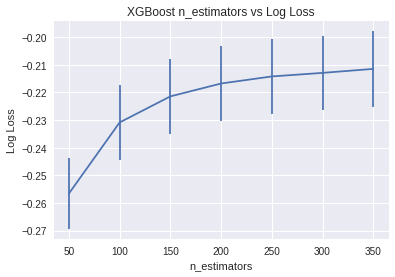

In [42]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of  n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [43]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Best: -0.207976 using {'max_depth': 7}
-0.331968 (0.010054) with: {'max_depth': 1}
-0.230848 (0.013622) with: {'max_depth': 3}
-0.212688 (0.014179) with: {'max_depth': 5}
-0.207976 (0.014161) with: {'max_depth': 7}
-0.213360 (0.013210) with: {'max_depth': 9}


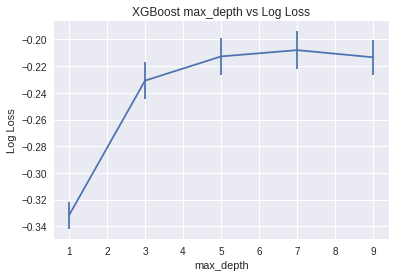

In [44]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.



In [45]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 27.0min finished


Best: -0.208435 using {'max_depth': 6, 'n_estimators': 250}
-0.211353 (0.014784) with: {'max_depth': 6, 'n_estimators': 350}
-0.209947 (0.014771) with: {'max_depth': 6, 'n_estimators': 300}
-0.208435 (0.014619) with: {'max_depth': 6, 'n_estimators': 250}
-0.213208 (0.015019) with: {'max_depth': 6, 'n_estimators': 400}
-0.217219 (0.014326) with: {'max_depth': 7, 'n_estimators': 350}
-0.214127 (0.014267) with: {'max_depth': 7, 'n_estimators': 300}
-0.211424 (0.014051) with: {'max_depth': 7, 'n_estimators': 250}
-0.220551 (0.014572) with: {'max_depth': 7, 'n_estimators': 400}
-0.225564 (0.013558) with: {'max_depth': 8, 'n_estimators': 350}
-0.221710 (0.013480) with: {'max_depth': 8, 'n_estimators': 300}
-0.218096 (0.013364) with: {'max_depth': 8, 'n_estimators': 250}
-0.229433 (0.013732) with: {'max_depth': 8, 'n_estimators': 400}
-0.235060 (0.015259) with: {'max_depth': 9, 'n_estimators': 350}
-0.230007 (0.014743) with: {'max_depth': 9, 'n_estimators': 300}
-0.225151 (0.014134) with: {'m

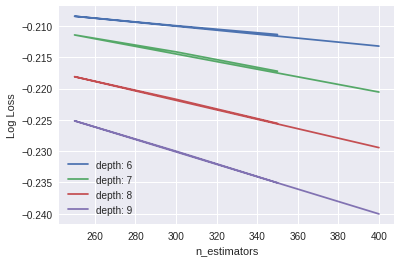

In [46]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=6).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters


In [0]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [48]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [0]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [50]:
print('AUC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

AUC for the XGBoost model is: 0.9117754626326054


## Thus we got a higher AUC for XGBoost model than the bagging models tried earlier

## Classification with Logistic Regression

Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

* Which independent variables are important?
* Is there multi-colinearity?
* How does it compare to the the models in Part A?

We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [53]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [0]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [0]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [56]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
import statsmodels.api as sm
from scipy import stats



logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            No. Iterations:   7.0000    
Dependent Variable: price_cat_log    Pseudo R-squared: 0.246     
Date:               2019-01-31 00:28 AIC:              15831.9276
No. Observations:   15129            BIC:              15877.6738
Df Model:           5                Log-Likelihood:   -7910.0   
Df Residuals:       15123            LL-Null:          -10486.   
Converged:          1.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
bedrooms         -0.3118   0.0285 -10.9592 0.0000 -0.3676 -0.2561
sqft_living       0.0019   0.0000  38.8693 0.0000  0.0018  0.0020
waterfront        1.9170   0.4188   4.5777 0.0000  1.0962  2.7378
sqft_basement     0.0002   0.0001   3.9257 0.0001  0.0001  0.0003
yr_built         -0.0016   0.0000 -36.0709 0.0000 -0.0017 -0.0015
bathrooms         0.1852   0.0403   4.5943 0.0000  0.1062  0.2641
=================================================================

"""

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

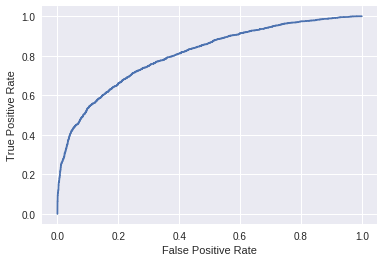

In [58]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [59]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

## As compared to Models in Part A, the accuracy of the Logistic Regression model is less. 

## Regression with Trees 
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem.
Answer the following questions for each supervised learner:

* Which hyper-parameters are important?    
* What hyper-parameter values work best?   
* Which supervised learner works best on the test data?  


### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [0]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [64]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 77265.4912 degrees.
Accuracy = 85.53%.


In [65]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=57, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 72715.7661 degrees.
Accuracy = 86.37%.


### Grid Search with Cross Validation

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [68]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 21.4min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [69]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [70]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 90955.9987 degrees.
Accuracy = 82.09%.


## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [0]:
from xgboost import XGBRegressor

In [72]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 82272.3963 degrees.
Accuracy = 84.23%.


In [73]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.708380 using {'n_estimators': 350}
0.679449 (0.018931) with: {'n_estimators': 50}
0.691849 (0.017751) with: {'n_estimators': 100}
0.697988 (0.017249) with: {'n_estimators': 150}
0.702478 (0.017025) with: {'n_estimators': 200}
0.705076 (0.016465) with: {'n_estimators': 250}
0.706901 (0.016271) with: {'n_estimators': 300}
0.708380 (0.015964) with: {'n_estimators': 350}


In [75]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.851495 using {'max_depth': 9}
0.671869 (0.034211) with: {'max_depth': 1}
0.817149 (0.032007) with: {'max_depth': 3}
0.848547 (0.046654) with: {'max_depth': 5}
0.851250 (0.048699) with: {'max_depth': 7}
0.851495 (0.040137) with: {'max_depth': 9}


In [76]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 15.9min finished


Best: 0.727194 using {'max_depth': 7, 'n_estimators': 300}
0.720548 (0.016397) with: {'max_depth': 4, 'n_estimators': 300}
0.721187 (0.016617) with: {'max_depth': 4, 'n_estimators': 350}
0.721799 (0.016651) with: {'max_depth': 4, 'n_estimators': 400}
0.725933 (0.015043) with: {'max_depth': 5, 'n_estimators': 300}
0.726046 (0.014972) with: {'max_depth': 5, 'n_estimators': 350}
0.725506 (0.014775) with: {'max_depth': 5, 'n_estimators': 400}
0.727151 (0.014710) with: {'max_depth': 6, 'n_estimators': 300}
0.726365 (0.014564) with: {'max_depth': 6, 'n_estimators': 350}
0.725000 (0.014728) with: {'max_depth': 6, 'n_estimators': 400}
0.727194 (0.013885) with: {'max_depth': 7, 'n_estimators': 300}
0.726100 (0.013757) with: {'max_depth': 7, 'n_estimators': 350}
0.724848 (0.013456) with: {'max_depth': 7, 'n_estimators': 400}


In [77]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 67639.0136 degrees.
Accuracy = 87.20%.


### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

#### Evaluating the regression models


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 138991.66


In [81]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 134570.58


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:21:40   Log-Likelihood:            -2.9351e+05
No. Observations:               21613   AIC:                         5.871e+05
Df Residuals:                   21568   BIC:                         5.875e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bedrooms         -1.851e+04   1846.963  

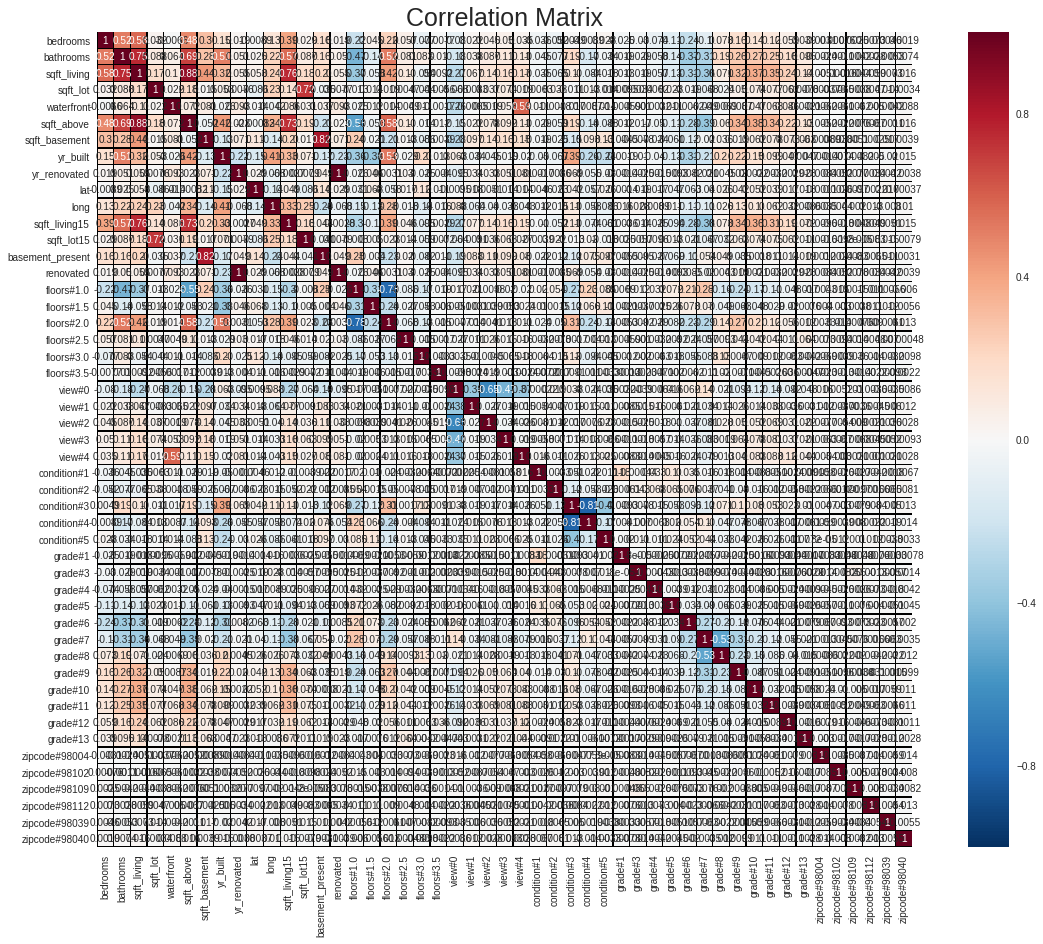

In [82]:
    model = sm.OLS(y_reg, X_reg).fit()#Fit linear model
    predictions = model.predict(X_reg) # make the predictions by the model
    # Print out the statistics
    print(model.summary())
    f, ax = plt.subplots(figsize=(20, 15))#Plots correlation matrix
    plt.title('Correlation Matrix',fontsize=25)
    sns.heatmap(X_reg[list(X_reg)].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="RdBu_r", linecolor='k', annot=True)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=10)


In [0]:
def get_mse(model,alpha):
    run_model = model(alpha = alpha)
    run_model.fit(X_train,y_train)
    return mean_squared_error(y_pred=run_model.predict(X_test),y_true=y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.138800e-19
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.416516e-19
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.138859e-18
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.416578e-18
  overwrite_a=True).T
/usr/local/lib/python3.6

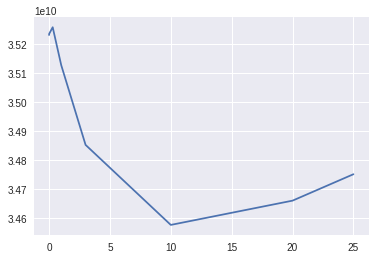

In [86]:
alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.3, 1, 3, 10, 20, 25]
ridge_mses = [get_mse(Ridge,x) for x in alphas]
plt.plot(alphas,ridge_mses)


In [87]:
pd.DataFrame({'alpha':alphas, 'MSE':ridge_mses}).sort_values('MSE',ascending = True)


,MSE,alpha
10,3.457701e+10,10.00000
11,3.466073e+10,20.00000
12,3.475185e+10,25.00000
9,3.485310e+10,3.00000
8,3.512825e+10,1.00000
0,3.523218e+10,0.00001
1,3.523218e+10,0.00003
2,3.523219e+10,0.00010
3,3.523220e+10,0.00030
4,3.523229e+10,0.00100


In [0]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_reg,y_reg)
coefs = ridge_model.coef_


In [89]:
predictions = ridge_model.predict(X_test)
print(predictions.mean())


541547.5084549723


In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','sigmoid','rbf'],
         'gamma':[1e-2, 1e-3, 1e-4, 1e-5]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


## Conclusions

Summarize your results in a few sentences and use this summary to support your conclusion. State whether your results support or contradict your hypothesis. 


If you are comparing many models create a table that orders the models and their evaluation and hyperparameters.



### Contributions

Must explain what was done by you and estimate a percentage of the code written by you.

## Citations

* Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
* Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* XGBoost Classifier & XGBoost Regression : 
    * https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
    * https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
* Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/ 
* SVM Classification: https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
* Ridge Normalization: https://www.kaggle.com/rgoodman/house-prices-from-scratch-ridge-and-lasso-viz

### License

Must have a license such as the MIT License [https://opensource.org/licenses/MIT](https://opensource.org/licenses/MIT)    